# Machine Intelligence II - Team MensaNord
## Sheet 06

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

## Exercise 1
### A

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io.wavfile
import scipy.stats

## Excercise 3
### A - mix

dict_keys(['__header__', '__version__', '__globals__', 'normal', 'laplacian', 'uniform'])
[ 4.4866489   3.68928424]
(2, 10000)


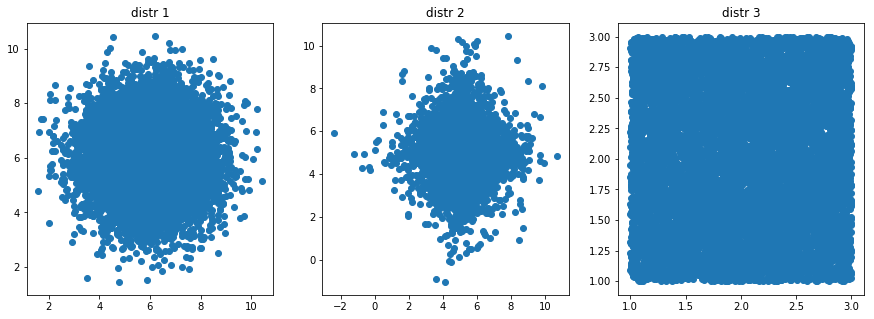

In [2]:
mat = scipy.io.loadmat("distrib.mat")

print(mat.keys())
print(mat['normal'][:, 0])

distr = np.array([np.zeros_like(mat['normal']) for i in range(3)])
distr[0] = mat['normal']
distr[1] = mat['laplacian']
distr[2] = mat['uniform']
print(distr[0].shape)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr[i][0], distr[i][1])
    plt.title('distr {}'.format(i+1))

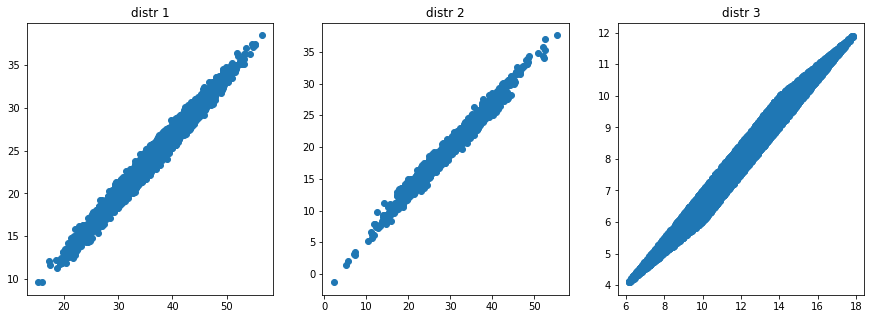

In [3]:
A = [[4, 2], [3, 1]]

distr_mixed = np.zeros_like(distr)
for i in range(len(distr)):
    distr_mixed[i] = np.dot(A, distr[i])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr_mixed[i][0], distr_mixed[i][1])
    plt.title('distr {}'.format(i+1))

### B - center

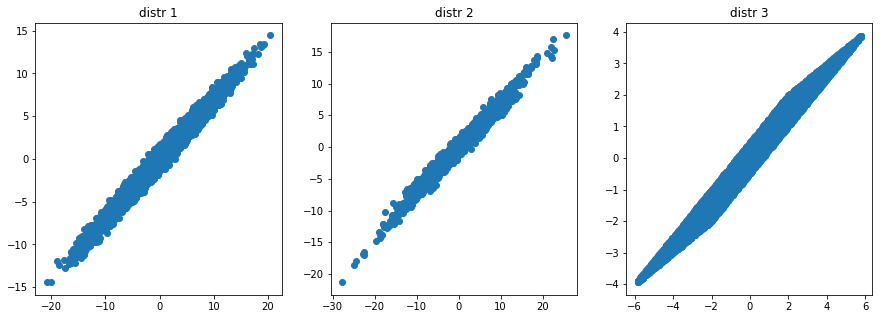

In [4]:
distr_mixed_centered = np.zeros_like(distr)
for i in range(len(distr)):
    distr_mixed_centered[i] = (distr_mixed[i].T - np.mean(distr_mixed[i], 1)).T

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr_mixed_centered[i][0], distr_mixed_centered[i][1])
    plt.title('distr {}'.format(i+1))

### C - project

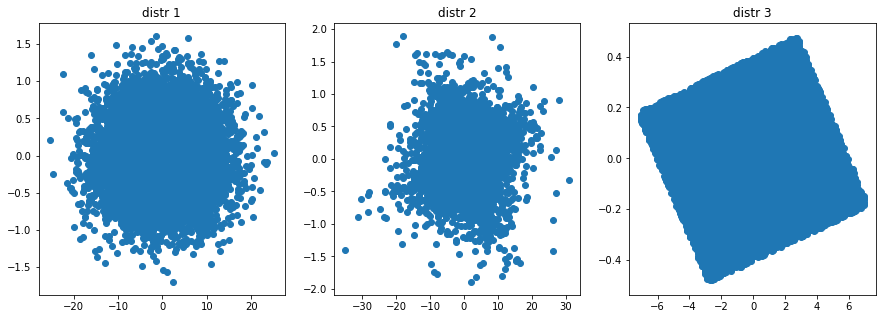

In [5]:
cov = np.cov(distr_mixed_centered[0])
eval, evec = np.linalg.eig(cov)
evals = np.array([np.zeros_like(eval) for i in range(3)])
evecs = np.array([np.zeros_like(evec) for i in range(3)])

distr_mixed_centered_projected = np.zeros_like(distr)
for i in range(len(distr)):
    cov = np.cov(distr_mixed_centered[i])
    evals[i], evecs[i] = np.linalg.eig(cov)
    distr_mixed_centered_projected[i] = np.dot(evecs[i].T, distr_mixed_centered[i])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr_mixed_centered_projected[i][0], distr_mixed_centered_projected[i][1])
    plt.title('distr {}'.format(i+1))

### D - whiten

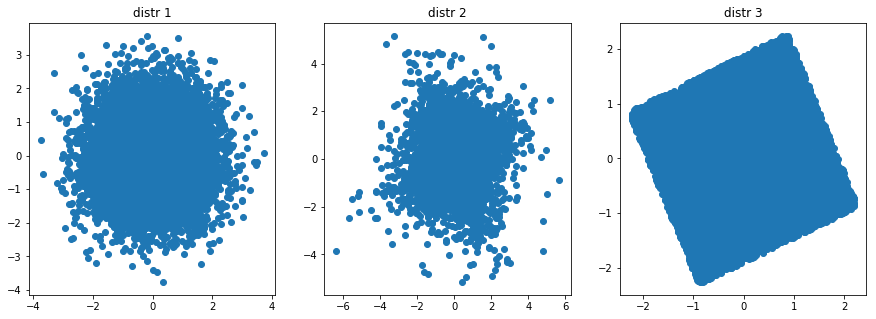

In [6]:
distr_mixed_centered_projected_whitened = np.zeros_like(distr)
for i in range(len(distr)):
    ## variant A: (takes evals/vecs from projected data for normalization)
    cov = np.cov(distr_mixed_centered_projected[i])
    eval, evec = np.linalg.eig(cov)
    distr_mixed_centered_projected_whitened[i] = \
        evec.T.dot(distr_mixed_centered_projected[i]).T.dot(np.diag(1 / np.sqrt(eval))).T
    ## variant B: (does not include step of projection)
    # distr_mixed_centered_projected_whitened[i] = \
    #     evecs[i].T.dot(distr_mixed_centered[i]).T.dot(np.diag(1 / np.sqrt(evals[i]))).T
    

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr_mixed_centered_projected_whitened[i][0], distr_mixed_centered_projected_whitened[i][1])
    plt.title('distr {}'.format(i+1))

### E - kurtosis

(3, 100, 2)


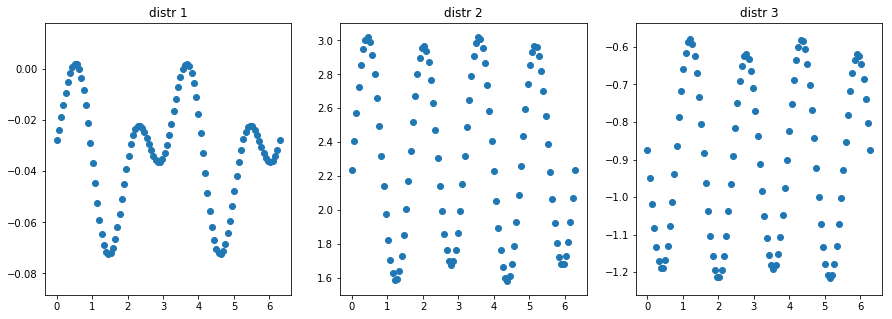

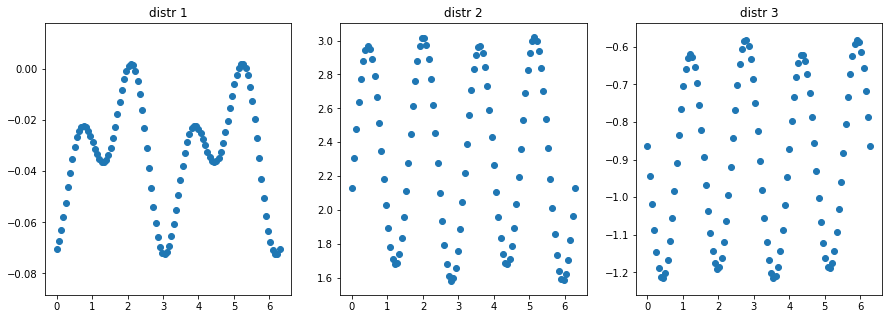

In [8]:
def R_theta(theta):
    return [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]

# define angles (2pi with 100 steps)
theta = np.linspace(0, 2*np.pi, 100)

# calculate kurtosis for each dimension
kurts = np.array([[[0.0, 0.0] for i in range(100)] for i in range(3)])
print(kurts.shape)
for i in range(len(distr)):
    for th in range(len(theta)):
        rotated_sample = np.dot(R_theta(theta[th]), distr_mixed_centered_projected_whitened[i])
        kurts[i][th][0] = scipy.stats.kurtosis(rotated_sample[0])
        kurts[i][th][1] = scipy.stats.kurtosis(rotated_sample[1])

# plot kurtosis of first dimension
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(theta, kurts[i][:].T[0])
    plt.title('distr {}'.format(i+1))
    
# plot kurtosis of second dimension
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(theta, kurts[i][:].T[1])
    plt.title('distr {}'.format(i+1))

We can see, that the kurtosis 
- for gaussian distribution is around 0
- for super-gaussian distribution is greater 0
- for sub-gaussian distribution is below 0

### F

0.00211542278361
58


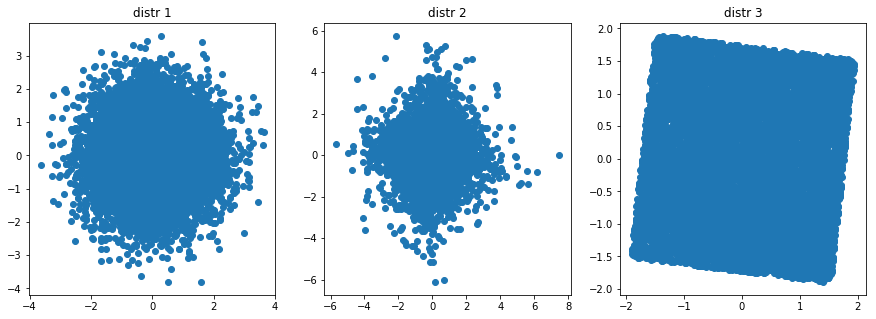

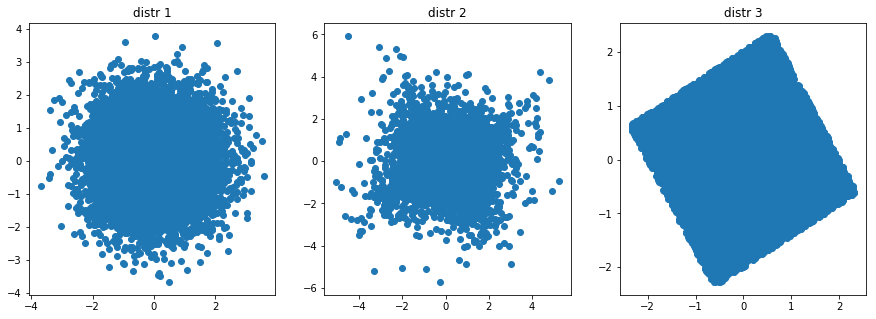

In [9]:
print(np.max(kurts[0][:].T[0]))
print(np.argmax(kurts[0][:].T[0]))

# MAX kurtosis for FIRST dimension and rotate the data accordingly -> scatter plots
distr_rotateMax = np.zeros_like(distr)
for i in range(len(distr)):
    indexOfTheta = np.argmax(kurts[0][:].T[0])
    distr_rotateMax[i] = np.dot(R_theta(theta[indexOfTheta]), distr_mixed_centered_projected_whitened[i])
    
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr_rotateMax[i][0], distr_rotateMax[i][1])
    plt.title('distr {}'.format(i+1))
    
# MIN ...
distr_rotateMin = np.zeros_like(distr)
for i in range(len(distr)):
    indexOfTheta = np.argmin(kurts[0][:].T[0])
    distr_rotateMin[i] = np.dot(R_theta(theta[indexOfTheta]), distr_mixed_centered_projected_whitened[i])
    
# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(distr_rotateMin[i][0], distr_rotateMin[i][1])
    plt.title('distr {}'.format(i+1))

### G - histograms

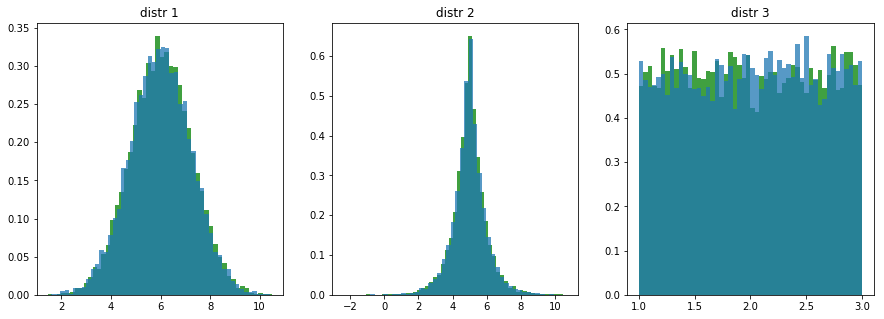

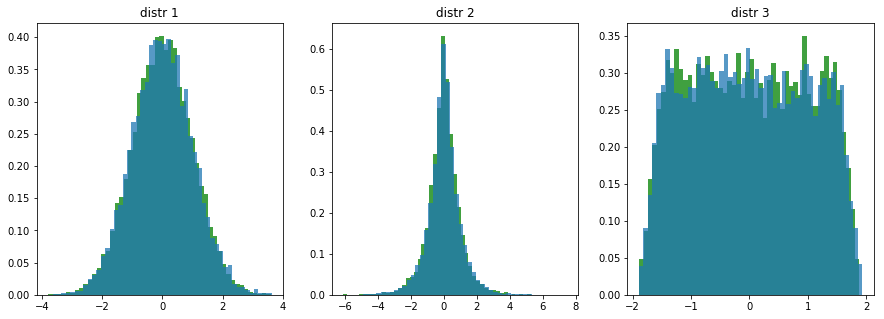

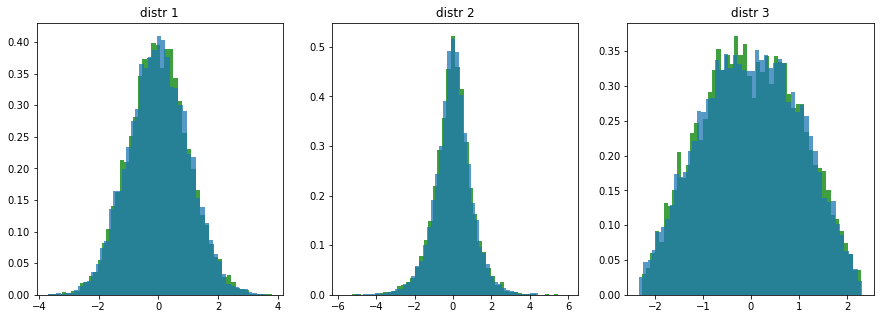

In [10]:
# WITHOUT MANIPULATION
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.hist(distr[i][1], 50, normed=1, alpha=0.75, color='green')
    plt.hist(distr[i][0], 50, normed=1, alpha=0.75)
    plt.title('distr {}'.format(i+1))

# MAX KURTOSIS ROTATION
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.hist(distr_rotateMax[i][1], 50, normed=1, alpha=0.75, color='green')
    plt.hist(distr_rotateMax[i][0], 50, normed=1, alpha=0.75)
    plt.title('distr {}'.format(i+1))
    
# MIN KURTOSIS ROTATION
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.hist(distr_rotateMin[i][1], 50, normed=1, alpha=0.75, color='green')
    plt.hist(distr_rotateMin[i][0], 50, normed=1, alpha=0.75)
    plt.title('distr {}'.format(i+1))

TODO compare the histograms after min/max rotation for the different distributions